In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mtdnetwork.network as network
import mtdnetwork.hacker as hacker

from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.osshuffle import OSShuffle
from mtdnetwork.mtd.serviceshuffle import ServiceShuffle
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle

import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

Number of endpoints: 5


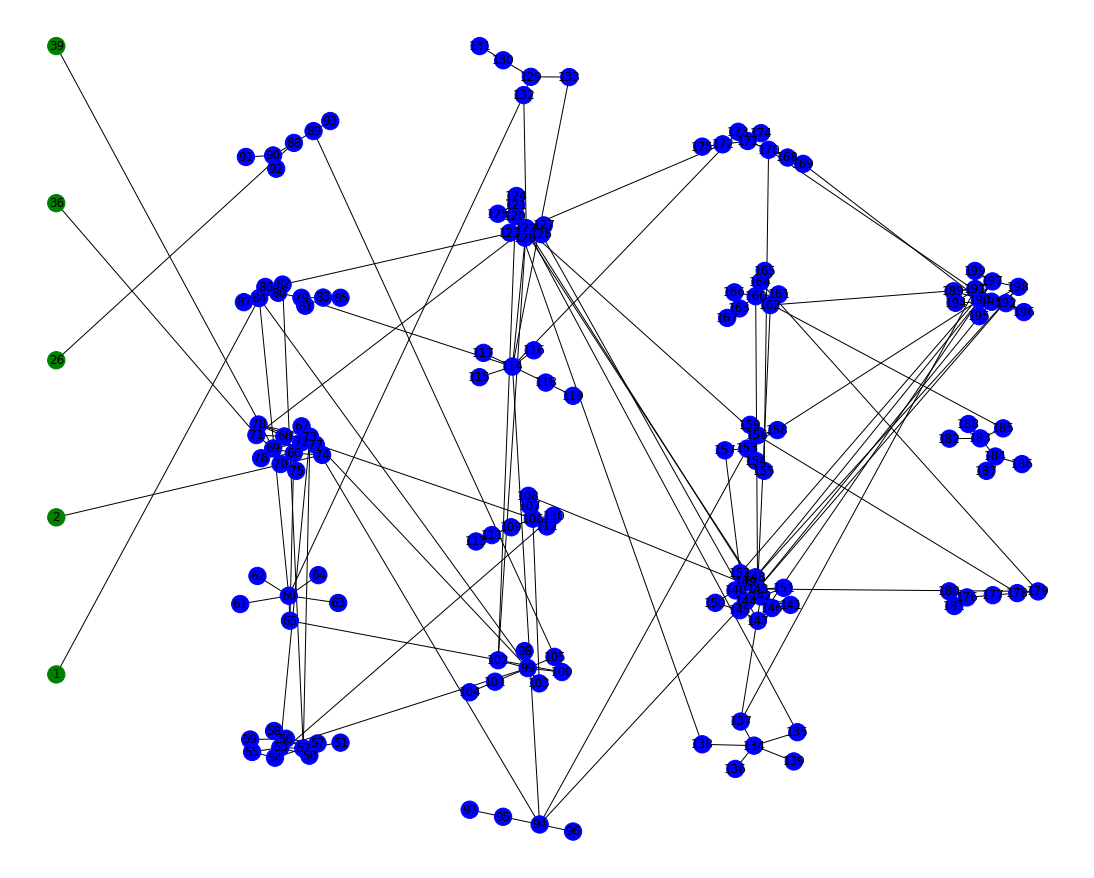

In [3]:
#Note, limited to 5 subnets per layer
test_network = network.Network(200, 50, 20, 5)
# test_network.register_mtd(PortShuffle)
# test_network.register_mtd(IPShuffle)
# test_network.register_mtd(OSShuffle)
# test_network.register_mtd(ServiceShuffle)
# test_network.register_mtd(UserShuffle)
# test_network.register_mtd(HostTopologyShuffle)
# test_network.register_mtd(CompleteTopologyShuffle)
test_network.draw()

In [4]:
test_network.gen_graph()

Number of endpoints: 2


Target Node is:  122
nodes per layer:  [20, 47, 45, 38, 50]


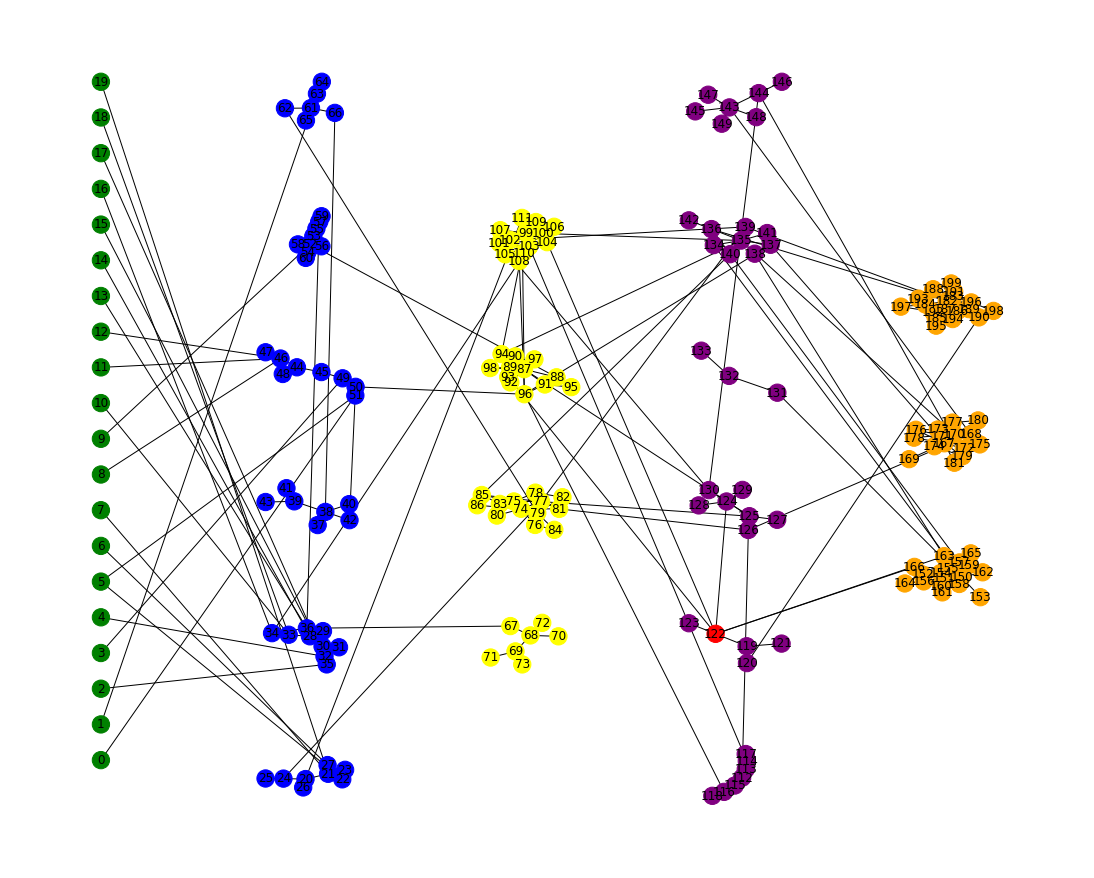

In [9]:
import mtdnetwork.targetnetwork as targetnetwork
alt_network = targetnetwork.Network(200, 20, 20, 5,3)
# alt_network.register_mtd(PortShuffle)
alt_network.register_mtd(IPShuffle)
# alt_network.register_mtd(OSShuffle)
# alt_network.register_mtd(ServiceShuffle)
# alt_network.register_mtd(UserShuffle)
# alt_network.register_mtd(HostTopologyShuffle)
# alt_network.register_mtd(CompleteTopologyShuffle)
alt_network.draw()

In [ ]:
hosts = alt_network.get_hosts()

# Regenerate the network graph
alt_network.regen_graph()
for host_id, host_instance in hosts.items():
    alt_network.graph.nodes[host_id]["host"] = host_instance
alt_network.update_reachable_mtd()

In [35]:
import mtdnetwork.scorer as scorer
stats = scorer.Statistics("CompromiseStatistics")
stats.get_dict()



{'record name': 'CompromiseStatistics',
 'x': [],
 'y': [],
 'cumulative y': [],
 'total events': 0}

In [23]:
test_network.get_statistics()

{'Total Initial Vulnerabilities': 453,
 'Initial Vulns Per OS': {'windows': {'vista': 13,
   '10': 15,
   '7': 26,
   '8.1': 8,
   '8': 31,
   'xp': 17},
  'ubuntu': {'20.04': 16,
   '16.04': 29,
   '18.04': 12,
   '14.04': 15,
   '12.04': 8,
   '10.04': 70},
  'centos': {'4': 4, '5': 30, '6': 13, '8': 11, '7': 23, '3': 15},
  'freebsd': {'13': 6, '10': 16, '11': 21, '12': 4, '9': 11, '8': 39}},
 'Average Initial RoA Per OS': {'windows': {'vista': 0.08450751170804133,
   '10': 0.052843813877887294,
   '7': 0.09996685514663262,
   '8.1': 0.14645100303652714,
   '8': 0.07406933606892946,
   'xp': 0.058308210168844174},
  'ubuntu': {'20.04': 0.07976412282166803,
   '16.04': 0.164818718525868,
   '18.04': 0.02408249337292696,
   '14.04': 0.07306061043493889,
   '12.04': 0.04549540620958476,
   '10.04': 0.05000817310215621},
  'centos': {'4': 0.009387829514954923,
   '5': 0.06416617370662543,
   '6': 0.014108721984852761,
   '8': 0.0747519448220947,
   '7': 0.0876790142892352,
   '3': 0.059

In [43]:
adversary = hacker.Hacker(alt_network)

In [44]:
curr_time = 0
time_step = 1
for curr_time in range(200000):
    alt_network.step(curr_time)
    adversary.step(curr_time)
    if adversary.done:
        break
print("DONE")
print("TIME:", curr_time)

INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:9:centos:6
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [6, 9, 11, 12, 22, 25, 35]
This host has been compromised:  9
Reachable Compromised Appended: [9]
Reachable Compromised: [9]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]


INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS


Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
Hosts found by scan:  [86, 6, 11, 12, 22, 25, 35]
DONE
TIME: 199999


In [41]:
alt_network.get_reachable()

[25, 1]

In [11]:
adversary.get_statistics()

{'Total Host Compromises': 0,
 'Total User Compromises': 0,
 'Total Vuln Compromises': 0,
 'Total Reuse Pass Compromises': 0,
 'Total Password Spray Compromises': 0,
 'Total Actions Blocked by MTD': 0,
 'Compromised hosts': []}

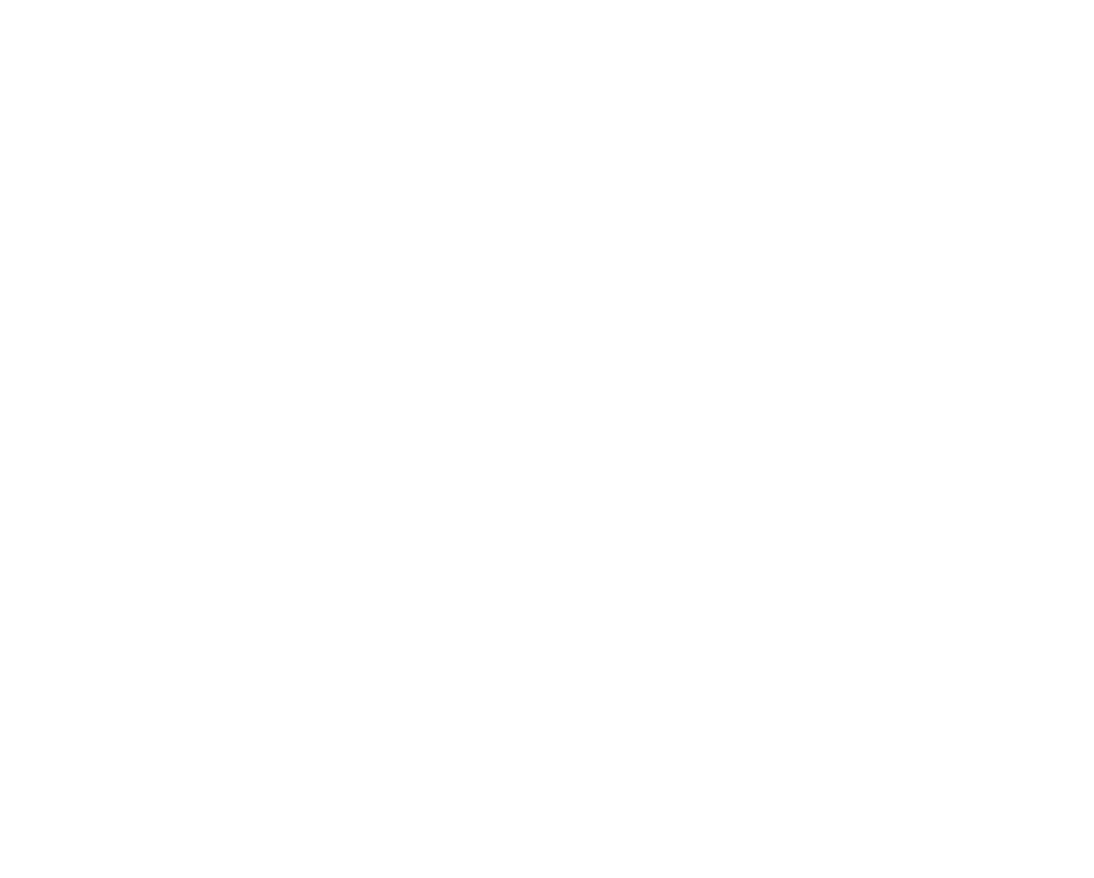

In [12]:
test_network.draw_compromised(adversary.compromised_hosts)

In [13]:
test_network.get_statistics()

{'Total Initial Vulnerabilities': 453,
 'Initial Vulns Per OS': {'windows': {'vista': 13,
   '10': 15,
   '7': 26,
   '8.1': 8,
   '8': 31,
   'xp': 17},
  'ubuntu': {'20.04': 16,
   '16.04': 29,
   '18.04': 12,
   '14.04': 15,
   '12.04': 8,
   '10.04': 70},
  'centos': {'4': 4, '5': 30, '6': 13, '8': 11, '7': 23, '3': 15},
  'freebsd': {'13': 6, '10': 16, '11': 21, '12': 4, '9': 11, '8': 39}},
 'Average Initial RoA Per OS': {'windows': {'vista': 0.08450751170804133,
   '10': 0.052843813877887294,
   '7': 0.09996685514663262,
   '8.1': 0.14645100303652714,
   '8': 0.07406933606892946,
   'xp': 0.058308210168844174},
  'ubuntu': {'20.04': 0.07976412282166803,
   '16.04': 0.164818718525868,
   '18.04': 0.02408249337292696,
   '14.04': 0.07306061043493889,
   '12.04': 0.04549540620958476,
   '10.04': 0.05000817310215621},
  'centos': {'4': 0.009387829514954923,
   '5': 0.06416617370662543,
   '6': 0.014108721984852761,
   '8': 0.0747519448220947,
   '7': 0.0876790142892352,
   '3': 0.059

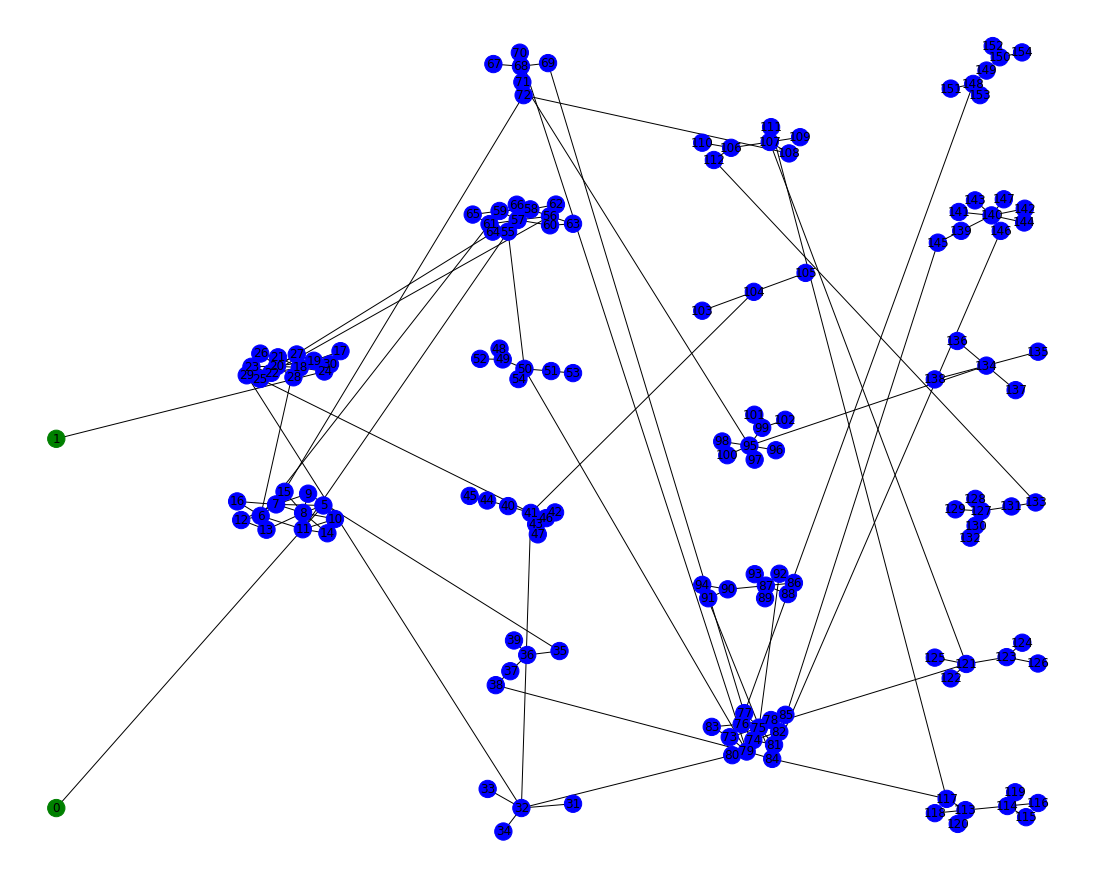

In [14]:
test_network.draw()

In [15]:
adversary.observed_changes

{}

In [16]:
test_network.users_list

[('Amelita', False),
 ('Kattie', False),
 ('Zonda', False),
 ('Jeanie', False),
 ('Petronille', False),
 ('Aila', False),
 ('Lorelei', False),
 ('Agace', False),
 ('Wanids', False),
 ('Frieda', False),
 ('Ray', False),
 ('Sile', False),
 ('Norene', False),
 ('Prue', False),
 ('Demetria', False),
 ('Ricca', False),
 ('Rebekkah', False),
 ('Norrie', False),
 ('Cati', False),
 ('Jacquelyn', False),
 ('Idette', False),
 ('Beverly', False),
 ('Kippy', False),
 ('Leta', False),
 ('Debby', False),
 ('Sandy', False),
 ('Sande', False),
 ('Ynez', False),
 ('Candy', False),
 ('Susana', True),
 ('Elora', False),
 ('Timmie', False),
 ('Elna', False),
 ('Cecilia', False),
 ('Ethelind', False),
 ('Thomasina', False),
 ('Marti', False),
 ('Heidi', False),
 ('Tracey', False),
 ('Lynette', False),
 ('Devon', False),
 ('Tandi', False),
 ('Veronique', False),
 ('Judi', False),
 ('Nani', False),
 ('Aindrea', False),
 ('Vivianne', False),
 ('Allx', False),
 ('Gretna', False),
 ('Perle', False),
 ('Toni', F

In [17]:
import random
random.randint(1,20)

19